In [8]:
# import argparse as ag
# import sys
# import numpy as np
# import json
# import math
# import matplotlib.pyplot as plt
# class FNN():
#     def __init__(self):
#         print("Model created")
#         self.iter_limit = 10000
#     def relu(self,data):
#         return np.maximum(data,0)
#     def relu_deriv(self,data):
#         data[data<=0] = 0
#         data[data>0] = 1
#         return data
#     def softmax(self,data):
#         if(len(data.shape) > 1):
#             exp_minmax = lambda x: np.exp(x - np.max(x))
#             denom = lambda x: 1.0 / np.sum(x)
#             data = np.apply_along_axis(exp_minmax,1,data)
#             denominator = np.apply_along_axis(denom,1,data)
#             if len(denominator.shape) == 1:
#                 denominator = denominator.reshape((denominator.shape[0],1))
#             result = data * denominator
#         else:
#             data_ = data - np.max(data)
#             data_exp = np.exp(data_)
#             result = data_exp/np.sum(data_exp)
#         return result
#     def parse_command(self):
#         parser = ag.ArgumentParser()
#         parser.add_argument('-c', '--config')
#         parser.add_argument('-w', '--weight')
#         parser.add_argument('-i', '--imgfilelistname')
#         args = parser.parse_args()
#         return args.config, args.weight, args.imgfilelistname
#     def read_config(self,config_fn,weight_fn,img_filelist_name_fn):
#         # read <config>.json
#         self.config = json.load(open(config_fn,"r"))
#         # read <weight>.npz
#         self.weight = np.load(weight_fn) # use train.files to check category
#         # read <imgfilelistname>.txt
#         file = open(img_filelist_name_fn,"r")
#         self.img_filelist_name = file.read().splitlines()
#         file.close()
#         self.batch_size = self.config["batch_size"]
#         self.learning_rate = self.config["lr"]
#         self.epoch = self.config["epoch"]
#         self.ip_dim = self.config["nn"]["layer1"]["input_dim"]
#         self.l1_dim = self.config["nn"]["layer1"]["output_dim"]
#         self.l2_dim = self.config["nn"]["layer2"]["output_dim"]
#         self.op_dim = self.config["nn"]["output"]["output_dim"]
#     def read_data(self):
#         # read train_data.npz
#         tmp = np.load("train.npz")
#         self.train_data = tmp['image']
#         tmp_label = tmp['label']
#         self.train_label = []
#         for i in range(len(tmp_label)):
#             tmp = [0]*6
#             tmp[tmp_label[i]] = 1
#             self.train_label.append(tmp)
#         self.train_label = np.array(self.train_label)
#         self.train_N = len(self.train_data)
#         # read test_data.npz
#         tmp = np.load("test.npz")
#         self.test_data = tmp['image']
#         tmp_label = tmp['label']
#         self.test_label = []
#         for i in range(len(tmp_label)):
#             tmp = [0]*6
#             tmp[tmp_label[i]] = 1
#             self.test_label.append(tmp)
#         self.test_label = np.array(self.test_label)
#         self.test_N = len(self.test_data)
#     def preprocess(self):
#         # Normalize images
#         self.test_data = self.test_data/255
#         self.train_data = self.train_data/255
#         # Flatten images in row-major order
#         self.train_data = self.train_data.reshape(self.train_N,1024)
#         self.test_data = self.test_data.reshape(self.test_N,1024)
#     def set_hyper_param(self,ep,lr,bs,il):
#         self.epoch = ep
#         self.learning_rate = lr
#         self.batch_size = bs
#         self.iter_limit = il
#     def set_network(self,l1,l2):
#         self.ip_dim = 1024
#         self.l1_dim = l1
#         self.l2_dim = l2
#         self.op_dim = 6
#     def init_weight(self):
#         self.w = []
#         self.w.append(np.random.rand(self.ip_dim,self.l1_dim)-0.5)
#         self.w.append(np.random.rand(self.l1_dim,self.l2_dim)-0.5)
#         self.w.append(np.random.rand(self.l2_dim,self.op_dim)-0.5)
#     def init_weight_zeros(self):
#         self.w = []
#         self.w.append(np.zeros((self.ip_dim,self.l1_dim)))
#         self.w.append(np.zeros((self.l1_dim,self.l2_dim)))
#         self.w.append(np.zeros((self.l2_dim,self.op_dim)))
#     def get_loss(self,train_data,train_label,bs):
#         loss = 0.0
#         SMALL_CONSTANT = 0.000000001
#         # train loss
#         layer0_data = train_data
#         layer1_data_ip = np.dot(layer0_data,self.w[0])
#         layer1_data_op = self.relu(layer1_data_ip)
#         layer2_data_ip = np.dot(layer1_data_op,self.w[1])
#         layer2_data_op = self.relu(layer2_data_ip)
#         layer3_data_ip = np.dot(layer2_data_op,self.w[2])
#         layer3_data_op = self.softmax(layer3_data_ip)
#         loss = np.sum(np.multiply(np.log(layer3_data_op+SMALL_CONSTANT),train_label))
#         loss = -loss
#         train_loss = loss/bs
#         # test loss
#         layer0_data = self.test_data
#         layer1_data_ip = np.dot(layer0_data,self.w[0])
#         layer1_data_op = self.relu(layer1_data_ip)
#         layer2_data_ip = np.dot(layer1_data_op,self.w[1])
#         layer2_data_op = self.relu(layer2_data_ip)
#         layer3_data_ip = np.dot(layer2_data_op,self.w[2])
#         layer3_data_op = self.softmax(layer3_data_ip)
#         loss = np.sum(np.multiply(np.log(layer3_data_op+SMALL_CONSTANT),self.test_label))
#         loss = -loss
#         test_loss = loss/self.test_N
#         return train_loss, test_loss
#     def get_accuracy(self):
#         train_cnt = 0
#         test_cnt = 0
#         layer0_data = self.train_data
#         layer1_data_ip = np.dot(layer0_data,self.w[0])
#         layer1_data_op = self.relu(layer1_data_ip)
#         layer2_data_ip = np.dot(layer1_data_op,self.w[1])
#         layer2_data_op = self.relu(layer2_data_ip)
#         layer3_data_ip = np.dot(layer2_data_op,self.w[2])
#         layer3_data_op = self.softmax(layer3_data_ip)
#         for i in range(self.train_N):
#             if(np.argmax(layer3_data_op[i]) == np.argmax(self.train_label[i])):
#                 train_cnt+=1
#         layer0_data = self.test_data
#         layer1_data_ip = np.dot(layer0_data,self.w[0])
#         layer1_data_op = self.relu(layer1_data_ip)
#         layer2_data_ip = np.dot(layer1_data_op,self.w[1])
#         layer2_data_op = self.relu(layer2_data_ip)
#         layer3_data_ip = np.dot(layer2_data_op,self.w[2])
#         layer3_data_op = self.softmax(layer3_data_ip)
#         for i in range(self.test_N):
#             if(np.argmax(layer3_data_op[i]) == np.argmax(self.test_label[i])):
#                 test_cnt+=1
#         return train_cnt/self.train_N , test_cnt/self.test_N
#     def update_weight(self,data_,label_,batch_size_):
#         # calculate gradient
#         weight3_gradient = np.zeros((self.l2_dim,self.op_dim))
#         weight2_gradient = np.zeros((self.l1_dim,self.l2_dim))
#         weight1_gradient = np.zeros((self.ip_dim,self.l1_dim))
#         # feed forward
#         layer0_data = data_ # 2048*1024
#         layer1_data_ip = np.dot(layer0_data,self.w[0]) # 2048*2048
#         layer1_data_op = self.relu(layer1_data_ip)
#         layer2_data_ip = np.dot(layer1_data_op,self.w[1])
#         layer2_data_op = self.relu(layer2_data_ip)
#         layer3_data_ip = np.dot(layer2_data_op,self.w[2])
#         layer3_data_op = self.softmax(layer3_data_ip)
#         # get label
#         label = label_
#         # get w3 gradient
#         weight3_prefix = layer3_data_op-label
#         weight3_gradient = np.dot(layer2_data_op.T,weight3_prefix)
#         #print("w3 ok")
#         # get w2 gradient
#         weight2_prefix = np.dot(weight3_prefix,self.w[2].T)*self.relu_deriv(layer2_data_ip)
#         weight2_gradient = np.dot(layer1_data_op.T,weight2_prefix)
#         # get w1 gradient
#         weight1_prefix = np.dot(weight2_prefix,self.w[1].T)*self.relu_deriv(layer1_data_ip)
#         weight1_gradient = np.dot(layer0_data.T,weight1_prefix)
#         # get average of gradient(mini-batch)
# #         weight3_gradient /= batch_size_
# #         weight2_gradient /= batch_size_
# #         weight1_gradient /= batch_size_
#         self.w[2] -= weight3_gradient*self.learning_rate
#         self.w[1] -= weight2_gradient*self.learning_rate
#         self.w[0] -= weight1_gradient*self.learning_rate
#     def train(self):
#         print("training starts")
#         self.loss_train_list = []
#         self.loss_test_list = []
#         self.accur_train_list = []
#         self.accur_test_list = []
#         #for ep in range(self.epoch):
#         #print("Epoch number:")
#         iter_cnt = 0
#         for ep in range(self.epoch):
#             #print(ep+1)
#             for i in range(0,self.train_N,self.batch_size):
#                 #print(i//self.batch_size)
#                 iter_cnt += 1
#                 bs = self.batch_size
#                 if((self.train_N-i) < self.batch_size):
#                     bs = self.train_N-i
#                 # calculate loss
#                 loss_train, loss_test = self.get_loss(self.train_data[i:i+bs],self.train_label[i:i+bs],bs)
#                 #print("loss:",loss_train,loss_test)
#                 accur_train, accur_test = self.get_accuracy()
#                 #print("accuracy:",accur_train,accur_test)
#                 self.loss_train_list.append(loss_train)
#                 self.loss_test_list.append(loss_test)
#                 self.accur_train_list.append(accur_train)
#                 self.accur_test_list.append(accur_test)
#                 if(iter_cnt > self.iter_limit or accur_train >= 1.0 or accur_test >= 1.0):
#                     return
#                 self.update_weight(self.train_data[i:i+bs],self.train_label[i:i+bs],bs)
#     def draw_map(self):
#         plt.plot(self.loss_train_list)
#         plt.title("Train Loss")
#         plt.xlabel("Iteration")
#         plt.ylabel("Average Loss")
#         plt.show()
#         plt.plot(self.loss_test_list)
#         plt.title("Test Loss")
#         plt.xlabel("Iteration")
#         plt.ylabel("Average Loss")
#         plt.show()
#         plt.plot(self.accur_train_list)
#         plt.title("Train Accuracy")
#         plt.xlabel("Iteration")
#         plt.ylabel("Accuracy")
#         plt.show()
#         plt.plot(self.accur_test_list)
#         plt.title("Test Accuracy")
#         plt.xlabel("Iteration")
#         plt.ylabel("Accuracy")
#         plt.show()

# 1-1(a)
- 模型描述
    - input: 1024, layer1: 256, layer2: 64, output: 6 
    - Epoch: 20
    - Learning rate: 0.001
    - Batch size: 100
    - 在求cross-entropy時發現好像有些輸出值會=0，放入公式後會造成runtime error，所以在每個輸出值都加上了一個很小的數字SMALL_CONSTANT
- 討論分析
    - Hidden layer的neuron數是可以調整的，測試之下(256,64)雖然每一次epoch會跑比較久，但是相對的準確率跟Loss的表現會比較好
    - Learning rate的調整的話，如果調得太大，圖形會上下震盪比較大，也比較不容易收斂，測試之下0.001表現得比較穩定

Model created
training starts


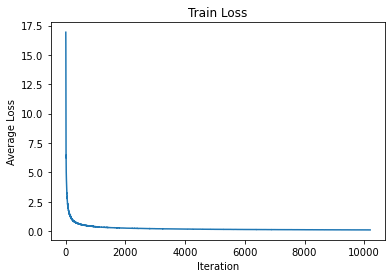

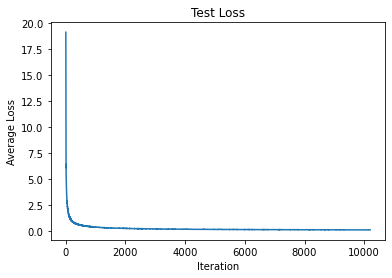

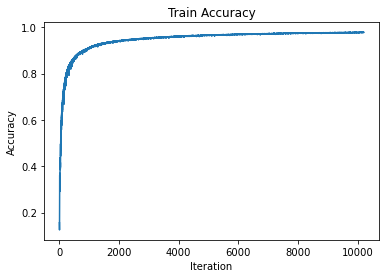

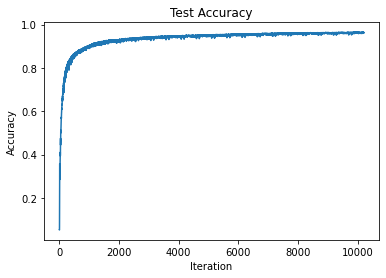

In [30]:
# fnn = FNN()
# #config_fn, weight_fn, img_filelist_name_fn = fnn.parseCommand() # fn: file name
# fnn.read_data()
# fnn.set_network(l1=256,l2=64);
# fnn.set_hyper_param(ep=20,lr=0.001,bs=100)
# fnn.init_weight()
# fnn.preprocess()
# fnn.train()
# fnn.draw_map()

# 1-1(b)
- 模型描述
    - 只有調整不同batch size，其他都統一
    - Learning rate: 0.001
    - Hidden Layer1, Hidden Layer2: (64,32)
        - 把hidden layer的層數調低一點，讓batch size小的模型訓練可以快一點
    - 在求cross-entropy時發現好像有些輸出值會=0，放入公式後會造成runtime error，所以在每個輸出值都加上了一個很小的數字SMALL_CONSTANT
    - 有訂定幾個iteration的中止條件，使結果快點跑出來
        - Max iteration count: 500
        - Accuracy of train: 0.98
        - Accuracy of test: 0.98
- 分析討論
    - 共測試了batch size = 10,100,1024三種情況
    - 首先可以發現，batch size = 10,100之圖形上下震盪的蠻厲害的，我覺得有以下原因
        - 因為是一次iteration去就計算loss和accuracy，所以可能因為learning rate調得太大了而造成這種結果，若改成用epoch來計算loss和accuracy可能會有比較平緩的結果
        - learning rate調小一點確實可以讓他震盪比較小，但是要花的時間就比較久，所以我選擇讓他最終有收斂，但是在過程中震盪幅度大了一點。
        - 還有就是batch size越大的話，也能夠抑制震盪，因為梯度下降的方向會更準確
    - 由以下的模型可以大致看出batch size越小，在相同的iteration number的條件下，他的loss會比較高，震盪的幅度也會越大，因為batch size越小代表說模型只看了一點點的數據就去更新weight，如果一次看多點數據再去更新weight的話，會更接近真實的數據。而batch size太大的話，則會造成記憶體不足，所以訓練時必須設定一個恰當的batch size值

### Test-1(bs = 10): 

Model created
training starts


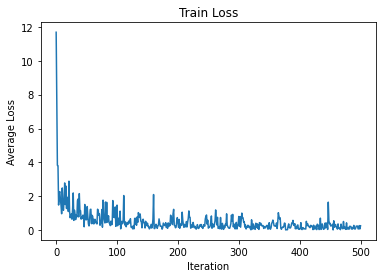

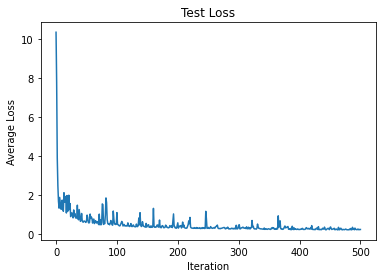

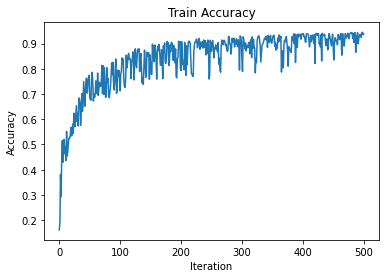

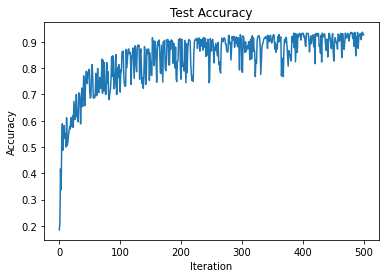

In [9]:
# fnn = FNN()
# #config_fn, weight_fn, img_filelist_name_fn = fnn.parseCommand() # fn: file name
# fnn.read_data()
# fnn.set_network(l1=64,l2=32);
# fnn.set_hyper_param(ep=20,lr=0.001,bs=10,il=500)
# fnn.init_weight()
# fnn.preprocess()
# fnn.train()
# fnn.draw_map()

### Test-2(bs = 100)

Model created
training starts


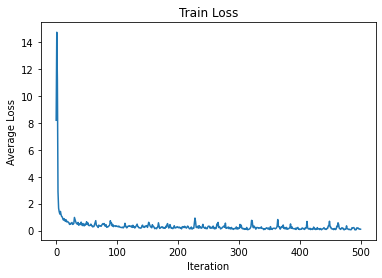

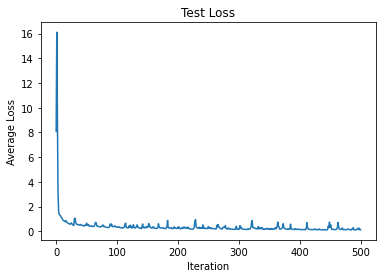

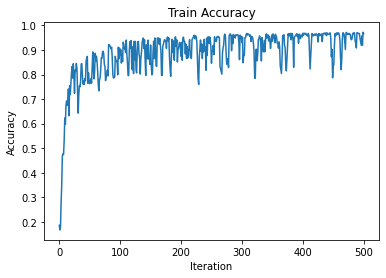

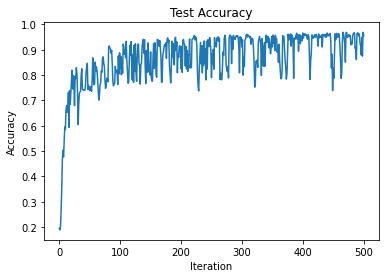

In [10]:
# fnn = FNN()
# #config_fn, weight_fn, img_filelist_name_fn = fnn.parseCommand() # fn: file name
# fnn.read_data()
# fnn.set_network(l1=64,l2=32);
# fnn.set_hyper_param(ep=20,lr=0.001,bs=100,il=500)
# fnn.init_weight()
# fnn.preprocess()
# fnn.train()
# fnn.draw_map()

### Test-3(bs = 1024)

Model created
training starts


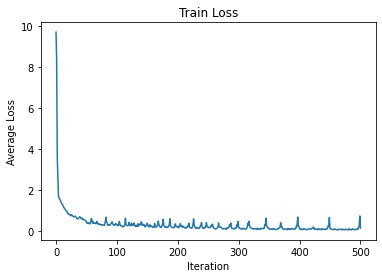

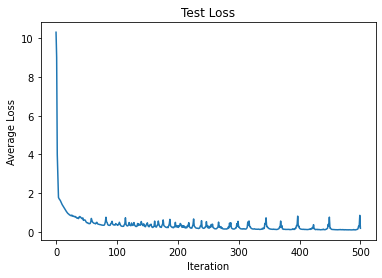

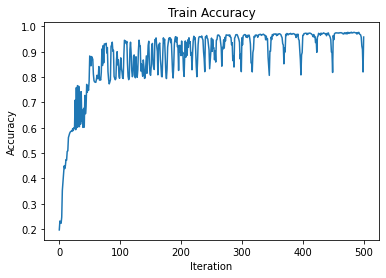

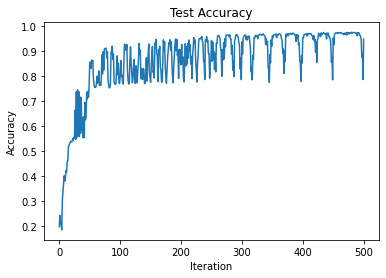

In [11]:
# fnn = FNN()
# #config_fn, weight_fn, img_filelist_name_fn = fnn.parseCommand() # fn: file name
# fnn.read_data()
# fnn.set_network(l1=64,l2=32);
# fnn.set_hyper_param(ep=20,lr=0.0001,bs=1024,il=500)
# fnn.init_weight()
# fnn.preprocess()
# fnn.train()
# fnn.draw_map()

## 1-1(c)
- 模型描述
    - Hidden layer1, Hidden layer2: (64,32)
    - Learning rate: 0.001
    - Batch size: 1024
    - weight initialization: all 0
    - 在求cross-entropy時發現好像有些輸出值會=0，放入公式後會造成runtime error，所以在每個輸出值都加上了一個很小的數字SMALL_CONSTANT
- 討論分析
    - 將weight設為0的話，**在每個neuron沒有bias的情況下**，feed forward而得到的每個分類之softmax機率皆為一樣: $\frac{1}{6}$，所以可以看到training accuracy差不多是0.167
    - 另外，若將weight設為0的話，**在每個neuron沒有bias的情況下**，如果仔細看backpropagation的公式會發現就會發現，首先，最靠近output layer那個gradient的公式會是(y-t)再乘上上一層的output A，因為上一層input Z的受到初始值weight為0的影響，變成0，經過ReLU之後仍為0，所以output A為0，也造成最靠近output layer那個gradient變成0，**所以weight無法更新**，至於接下來剩下的gradient公式都是一樣的，裡面都參雜了下一層的weight，而因為最後一層的weight永遠都不會更新，使得剩下的這些gradient也都是0，所以**剩下的weight也都不會更新!**。所以模型永遠都無法收斂，造成Trainin/Test loss永遠都是一樣的低。

Model created
training starts


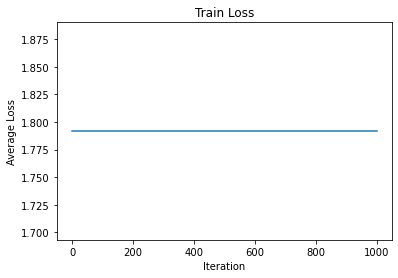

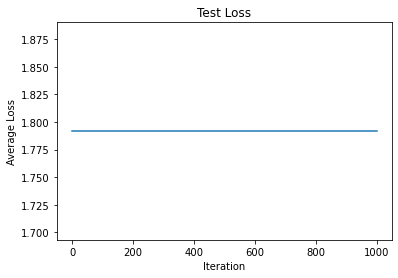

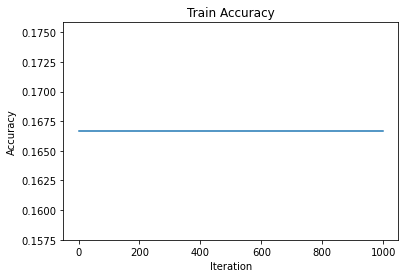

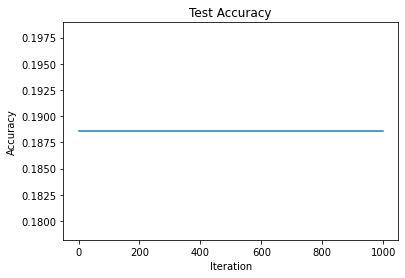

In [48]:
# fnn = FNN()
# #config_fn, weight_fn, img_filelist_name_fn = fnn.parseCommand() # fn: file name
# fnn.read_data()
# fnn.set_network(l1=64,l2=32);
# fnn.set_hyper_param(ep=20,lr=0.001,bs=1024)
# fnn.init_weight_zeros()
# fnn.preprocess()
# fnn.train()
# fnn.draw_map()

## 1-2(a)
- 模型描述
    - 超參數皆由檔案讀取
    - 讀取指令列參數的方式為argparse
    - Feedforward的activation function部分除了最後一層是用softmax，其他層皆是ReLU
    - Backpropagation的部分的話除了最後一層比較不一樣，其他層weight更新公式都一樣
    - 在求cross-entropy時發現好像有些輸出值會=0，放入公式後會造成runtime error，所以在每個輸出值都加上了一個很小的數字SMALL_CONSTANT
    - 設定中止條件(以防在batch size 過小的情況下，會跑很久)
        - Max iteration count: 5000
        - Accuracy of train: 0.98
        - Accuracy of test: 0.98
- 討論分析
    - 基本上就是把1-1的程式碼中feedward/backpropagation改成可以吃很多層的狀況

In [ ]:
import argparse as ag
import sys
import numpy as np
import json
import math
import matplotlib.pyplot as plt
class FNN2():
    def __init__(self):
        print("Model created")
        self.iter_limit = 5000
    def relu(self,data):
        return np.maximum(data,0)
    def relu_deriv(self,data):
        data[data<=0] = 0
        data[data>0] = 1
        return data
    def softmax(self,data):
        if(len(data.shape) > 1):
            exp_minmax = lambda x: np.exp(x - np.max(x)+0.0000001)
            denom = lambda x: 1.0 / np.sum(x)
            data = np.apply_along_axis(exp_minmax,1,data)
            denominator = np.apply_along_axis(denom,1,data)
            if len(denominator.shape) == 1:
                denominator = denominator.reshape((denominator.shape[0],1))
            result = data * denominator
        else:
            data_ = data - np.max(data)
            data_exp = np.exp(data_+0.0000001)
            result = data_exp/np.sum(data_exp)
        return result
    def parse_command(self):
        parser = ag.ArgumentParser()
        parser.add_argument('-c', '--config')
        parser.add_argument('-w', '--weight')
        parser.add_argument('-i', '--imgfilelistname')
        args = parser.parse_args()
        return args.config, args.weight, args.imgfilelistname
    def read_config(self,config_fn,weight_fn,img_filelist_name_fn):
        # read <config>.json
        config = json.load(open(config_fn,"r"))
        # read <weight>.npz
        weight = np.load(weight_fn) # use train.files to check category
        # read <imgfilelistname>.txt
        file = open(img_filelist_name_fn,"r")
        img_filelist_name = file.read().splitlines()
        file.close()
        # configure network
        self.batch_size = config["batch_size"]
        self.learning_rate = config["lr"]
        self.epoch = config["epoch"]
        self.ip_dim = 1024
        self.level_dim = []
        for i in range(1,len(config["nn"])):
            self.level_dim.append(config["nn"]["layer"+str(i)]["output_dim"])
        self.op_dim = 6
        # initial weight
        self.w = []
        for i in range(len(config["nn"])-1):
            self.w.append(weight['layer'+str(i+1)])
        self.w.append(weight['output'])
        # read images
        self.test_img = []
        for i in range(len(img_filelist_name)):
            img = np.array(plt.imread(img_filelist_name[i]))
            img = img.reshape(1,1024)
            img = img / 255
            self.test_img.append(img)
    def read_data(self):
        # read train_data.npz
        tmp = np.load("train.npz")
        self.train_data = tmp['image']
        tmp_label = tmp['label']
        self.train_label = []
        for i in range(len(tmp_label)):
            tmp = [0]*6
            tmp[tmp_label[i]] = 1
            self.train_label.append(tmp)
        self.train_label = np.array(self.train_label)
        self.train_N = len(self.train_data)
        # read test_data.npz
        tmp = np.load("test.npz")
        self.test_data = tmp['image']
        tmp_label = tmp['label']
        self.test_label = []
        for i in range(len(tmp_label)):
            tmp = [0]*6
            tmp[tmp_label[i]] = 1
            self.test_label.append(tmp)
        self.test_label = np.array(self.test_label)
        self.test_N = len(self.test_data)
    def preprocess(self):
        # Normalize images
        self.test_data = self.test_data/255
        self.train_data = self.train_data/255
        # Flatten images in row-major order
        self.train_data = self.train_data.reshape(self.train_N,1024)
        self.test_data = self.test_data.reshape(self.test_N,1024)
    def set_hyper_param(self,ep,lr,bs):
        self.epoch = ep
        self.learning_rate = lr
        self.batch_size = bs
    def set_network(self,l1,l2):
        self.ip_dim = 1024
        self.l1_dim = l1
        self.l2_dim = l2
        self.op_dim = 6
    def get_loss(self):
        loss = 0.0
        SMALL_CONSTANT = 0.000000001
        # train loss
        predict = self.feed_forward(self.train_data)
        loss = np.sum(np.multiply(np.log(predict+SMALL_CONSTANT),self.train_label))
        loss = -loss
        train_loss = loss/self.train_N
        # test loss
        predict = self.feed_forward(self.test_data)
        loss = np.sum(np.multiply(np.log(predict+SMALL_CONSTANT),self.test_label))
        loss = -loss
        test_loss = loss/self.test_N
        return train_loss, test_loss
    def feed_forward(self,data):
        level_num = len(self.w)
        A = data
        Z = data
        # feed forward
        for i in range(level_num-1):
            Z = np.dot(Z,self.w[i])
            A = self.relu(Z)
        Z = np.dot(Z,self.w[level_num-1])
        A = self.softmax(Z)
        return A
    def get_accuracy(self):
        train_cnt = 0
        test_cnt = 0
        predict = self.feed_forward(self.train_data)
        for i in range(self.train_N):
            if(np.argmax(predict[i]) == np.argmax(self.train_label[i])):
                train_cnt+=1
        predict = self.feed_forward(self.test_data)
        for i in range(self.test_N):
            if(np.argmax(predict[i]) == np.argmax(self.test_label[i])):
                test_cnt+=1
        return train_cnt/self.train_N , test_cnt/self.test_N
    def update_weight(self,data_,label_,batch_size_):
        weight_gradient = []
        A = []
        Z = []
        A.append(data_)
        Z.append(data_)
        level_num = len(self.w)
        # feed forward
        for i in range(level_num-1):
            Z.append(np.dot(Z[i],self.w[i]))
            A.append(self.relu(Z[i+1]))
        Z.append(np.dot(Z[level_num-1],self.w[level_num-1]))
        A.append(self.softmax(Z[level_num]))
        # get label
        label = label_
        # get first gradient
        prefix = A[level_num]-label
        weight_gradient.append(np.dot(A[level_num-1].T,prefix))
        for i in range(level_num-1,0,-1):
            prefix = np.dot(prefix,self.w[i].T)*self.relu_deriv(Z[i])
            weight_gradient.append(np.dot(A[i-1].T,prefix))
        # get average of gradient(mini-batch)
        for wg in weight_gradient:
            wg /= batch_size_
        cnt = 0
        for i in range(level_num-1,-1,-1):
            self.w[i] -= weight_gradient[cnt]*self.learning_rate
            cnt += 1
    def classification(self):
        result = ""
        for img in self.test_img:
            predict = np.argmax(self.feed_forward(img))
            result += str(predict)
        fp = open("output.txt","w")
        fp.writelines(result)
        fp.close()
    def train(self):
        print("training starts")
        self.loss_train_list = []
        self.loss_test_list = []
        self.accur_train_list = []
        self.accur_test_list = []
        #for ep in range(self.epoch):
        iter_cnt = 0
        for ep in range(self.epoch):
            print("ep:",ep)
            for i in range(0,self.train_N,self.batch_size):
                print(i//self.batch_size)
                # calculate loss
                loss_train, loss_test = self.get_loss()
                print("loss:",loss_train,loss_test)
                accur_train, accur_test = self.get_accuracy()
                print("accuracy:",accur_train,accur_test)
                self.loss_train_list.append(loss_train)
                self.loss_test_list.append(loss_test)
                self.accur_train_list.append(accur_train)
                self.accur_test_list.append(accur_test)
                bs = self.batch_size
                if((self.train_N-i) < self.batch_size):
                    bs = self.train_N-i
                self.update_weight(self.train_data[i:i+bs],self.train_label[i:i+bs],bs)
                if(iter_cnt > self.iter_limit or accur_train >= 0.98 or accur_test >= 0.98):
                    return
                iter_cnt += 1
#############################################################
fnn = FNN2()
config_fn, weight_fn, img_filelist_name_fn = fnn.parse_command() # fn: file name
fnn.read_config(config_fn, weight_fn, img_filelist_name_fn)
fnn.read_data()
print(fnn.learning_rate,fnn.epoch,fnn.batch_size)
for i in range(len(fnn.w)):
    print(fnn.w[i].shape)
fnn.preprocess()
fnn.train()
fnn.classification()